In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = pd.read_csv('gpa_iq.csv')
data.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


In [17]:
data.columns

Index(['obs', 'gpa', 'iq', 'gender', 'concept'], dtype='object')

In [18]:
data.isnull().sum()

obs        0
gpa        0
iq         0
gender     0
concept    0
dtype: int64

In [19]:
data.dtypes

obs          int64
gpa        float64
iq           int64
gender       int64
concept      int64
dtype: object

In [20]:
data['sex'] = data['gender'].replace([1, 2],['male', 'female'])

In [21]:
data['weightedGPA'] = ((data['gpa'] / 100) * 0.4) * 100
data

,obs,gpa,iq,gender,concept,sex,weightedGPA
0,1,7.940,111,2,67,female,3.1760
1,2,8.292,107,2,43,female,3.3168
2,3,4.643,100,2,52,female,1.8572
3,4,7.470,107,2,66,female,2.9880
4,5,8.882,114,1,58,male,3.5528
...,...,...,...,...,...,...,...
73,85,9.000,112,1,60,male,3.6000
74,86,9.500,112,1,70,male,3.8000
75,87,6.057,114,2,51,female,2.4228
76,88,6.057,93,1,21,male,2.4228


In [22]:
data.describe()

,obs,gpa,iq,gender,concept,weightedGPA
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,42.974359,7.446538,108.923077,1.602564,56.961538,2.978615
std,25.889864,2.099557,13.170973,0.492535,12.412229,0.839823
min,1.000000,0.530000,72.000000,1.000000,20.000000,0.212000
25%,20.250000,6.278000,103.000000,1.000000,51.000000,2.511200
50%,42.000000,7.829000,110.000000,2.000000,59.500000,3.131600
75%,62.750000,8.983000,117.500000,2.000000,66.000000,3.593200
max,89.000000,10.760000,136.000000,2.000000,80.000000,4.304000


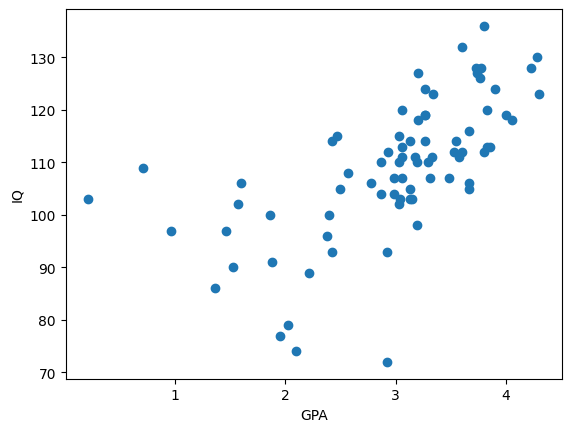

In [23]:
plt.scatter(data.weightedGPA, data.iq)
plt.xlabel('GPA')
plt.ylabel('IQ')
plt.show()

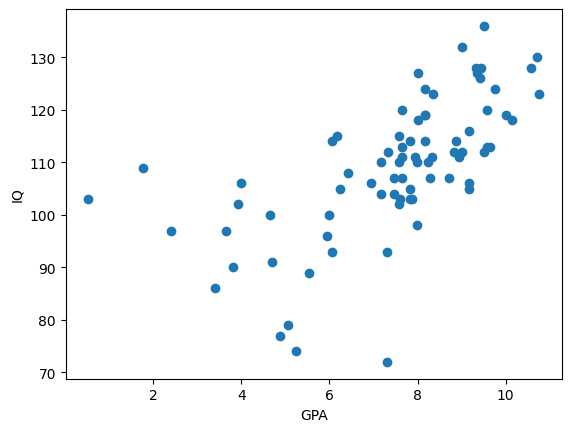

In [24]:
plt.scatter(data.gpa, data.iq)
plt.xlabel('GPA')
plt.ylabel('IQ')
plt.show()

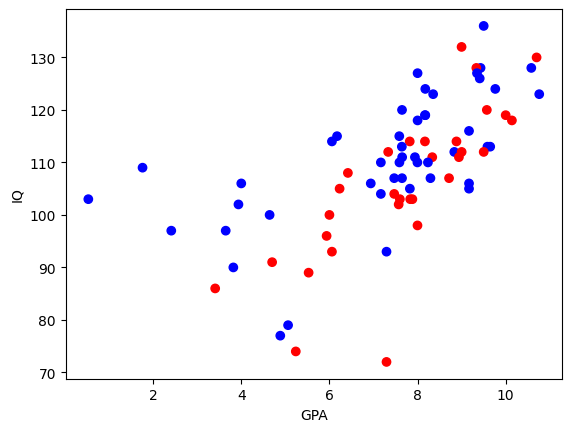

In [25]:
colors = data['sex'].replace(['male', 'female'], ['r', 'b'])
plt.scatter(data.gpa, data.iq, c = colors)
plt.xlabel('GPA')
plt.ylabel('IQ')
plt.show()

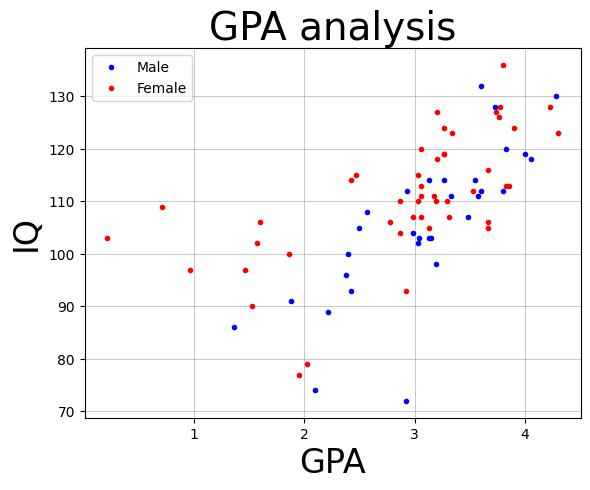

In [26]:
md, fd = data.groupby('gender')
md = md[1]
fd = fd[1]
plt.plot(md.weightedGPA, md.iq, 'b.', label = 'Male')
plt.plot(fd.weightedGPA, fd.iq, 'r.', label = 'Female')
plt.xlabel('GPA', fontsize = 24)
plt.ylabel('IQ', fontsize = 24)
plt.title('GPA analysis', fontsize = 28)
plt.legend()
plt.grid(which = 'both', linewidth=0.5)

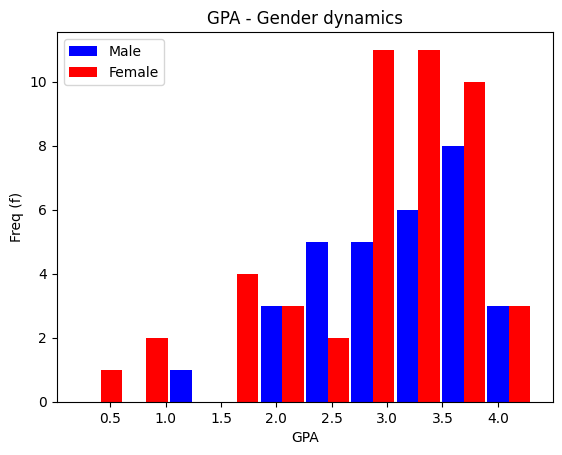

In [37]:
md, fd = data.groupby('gender')
md = md[1]
fd = fd[1]
maleGPA = md.weightedGPA
femaleGPA = fd.weightedGPA
plt.hist([maleGPA, femaleGPA], label = ['Male', 'Female'], color = ['Blue', 'Red'], rwidth = 0.95)
plt.xlabel('GPA')
plt.ylabel('Freq (f)')
plt.title('GPA - Gender dynamics')
plt.legend()